# BIKE SHARING CASE STUDY

## <font color="blue">Introduction
>Bike sharing system is a shared transport service, in which bikes are made available for shared use to a individuals on a short term basis for a price or fee. Many bike sharing systems allows customers to borrow a bike from one dock and return it at another dock of a same system. There are many bike sharing companies like BLOOM, OFO, Mobike, BoomBikes, Bounce, joyride, evemo, etc. in the world offering services in major metro cities.

## <font color="blue">Problem Statement
> A US bike sharing provider BoomBikes recently sufferered from revenue dips due to the ongoing corona pandemic.Because of the unexpected loss, the company is finding it difficult to sustain in the current market scenario. so it has decided to come up with the mindful business plan so that they can able to accelerate their revenue once the pandemic comes to an end and also boost the economy.
>    
> The company BoomBikes wanted to improve their business, they actually wanted to understand the demand of the shared bikes among the people once the pandemic comes to an end. They have planned this to prepare themselves to cater to the people's need and need to stand out among the competetors and to make huge profits.
>

## <font color="blue">Business Objectives

>The company specifically need to understand the factors affecting the demand of these shared bikes. They wants to find:
> - Which variables are significant in predicting the demand of the shared bikes
> - How well the variables describe the demand of the shared bikes
>    
>We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demand varies with different features

## <font color="blue">Data Understanding
    
>### 'day.csv'
> It contains the meterological informations, timing details and people's styles.
>    
> - instant: record index
> - dteday : date
> - season : season (1:spring, 2:summer, 3:fall, 4:winter)
> - yr : year (0: 2018, 1:2019)
> - mnth : month ( 1 to 12)
> - holiday : weather day is a holiday or not
> - weekday : day of the week
> - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
> + weathersit : 
	1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
> - temp : temperature in Celsius
> - atemp: feeling temperature in Celsius
> - hum: humidity
> - windspeed: wind speed
> - casual: count of casual users
> - registered: count of registered users
> - cnt: count of total rental bikes including both casual and registered

## <font color="blue">Data Preparation

### Importing libraries

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels
import statsmodels.api as sm
import sklearn
import warnings
warnings.filterwarnings("ignore")

### Customizing Settings

In [3]:
# Customizing the settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Importing Data

In [4]:
# Importing the data
bike = pd.read_csv("day.csv", index_col=0)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Cleaning

In [5]:
# Analyzing the shape of the data
print("The shape of the bike sharing data is",bike.shape)

The shape of the bike sharing data is (730, 15)


In [6]:
# Checking the informations of dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [7]:
# Checking for null values in all the columns
round((bike.isnull().sum()/len(bike))*100,2).sort_values(ascending=False)

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

There are no missing values in any of the rows or columns of the dataset

In [8]:
# Checking the unique values in the columns of the dataset
bike.apply(lambda x:len(x.unique()))

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [9]:
# Checking for duplicates
bike[bike.duplicated()]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,


No duplicate records are there in the dataset

In [10]:
# Changing the dteday column into datetime category to extract the day
bike["dteday"] = pd.to_datetime(bike["dteday"],format = "%d-%m-%Y")

# Extracting the weekday and day from dteday column
bike["Day_of_month"] = pd.DatetimeIndex(bike["dteday"]).day
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Day_of_month
instant,,,,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


### Removing Redundant columns

#### 1. dteday column:
> - Already all the required informations are extracted from this column and new columns are created like year, month, day and the details of the day. Thus we can drop this column too.
#### 2. atemp column:
> - The atemp column(feel like temperature) is depend on the air temperature. thus it will be highly correlated. Thus we can drop this column.
#### 3. casual and registered columns:
> - Using this features for the model will results in data leakage.
> - Both these columns contains count of bike booked by the customers who casually using without registering and those who have registered already. However we have an another column which have total counts of both which we will be using as dependent variable. so thus we can drop these two columns.

In [11]:
# Dropping dteday, atemp, causal, and registered column
bike.drop(["dteday","atemp","casual","registered"], axis=1,inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        730 non-null    int64  
 1   yr            730 non-null    int64  
 2   mnth          730 non-null    int64  
 3   holiday       730 non-null    int64  
 4   weekday       730 non-null    int64  
 5   workingday    730 non-null    int64  
 6   weathersit    730 non-null    int64  
 7   temp          730 non-null    float64
 8   hum           730 non-null    float64
 9   windspeed     730 non-null    float64
 10  cnt           730 non-null    int64  
 11  Day_of_month  730 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 74.1 KB


In [13]:
# Lets rename the column name for our convenience
bike.rename(columns={"yr":"Year","mnth":"Month","weathersit":"Weather","temp":"Temperature","hum":"Humidity","cnt":"Count"},
           inplace=True)
bike.columns = bike.columns.str.strip().str.capitalize()
bike.index.name = "Index"
bike.columns.name = "Features"
bike.head()

Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month
Index,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1
2,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,2
3,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,3
4,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,4
5,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,5


### Handling Data Types

In [14]:
# Checking the data types of the dataset
bike.dtypes

Features
Season            int64
Year              int64
Month             int64
Holiday           int64
Weekday           int64
Workingday        int64
Weather           int64
Temperature     float64
Humidity        float64
Windspeed       float64
Count             int64
Day_of_month      int64
dtype: object

#### <font color="blue"> Derived column: 
> ##### Quarterly:
> - Dividing the year into four parts
> - first(Jan,Feb,Mar), second(Apr,May,Jun), third(Jul,Aug,Sep), fourth(Oct,Nov,Dec)

In [15]:
# Creating a new variable Quartely before converting the month into categorical variable
bike["Quarterly"] = pd.cut(bike["Month"], bins=[0,3,6,9,12], labels=["first","second","third","fourth"])

# Giving exact names for some categorical column instead of number for easy interpretation
bike["Season"] = bike["Season"].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike["Year"] = bike["Year"].replace({0: "2018", 1:"2019"})
bike["Weekday"] = bike["Weekday"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",
                                           6:"Sat"})
bike["Month"] = bike["Month"].replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",
                                      7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
bike.head(3)

Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month,Quarterly
Index,,,,,,,,,,,,,
1,spring,2018,Jan,0,Sat,0,2,14.110847,80.5833,10.749882,985,1,first
2,spring,2018,Jan,0,Sun,0,2,14.902598,69.6087,16.652113,801,2,first
3,spring,2018,Jan,0,Mon,1,1,8.050924,43.7273,16.636703,1349,3,first


We know that the columns Season, Year, Month, Holiday, Weekday, Workingday, Weather, Day of month are categorical variables but expressed as integer. thus we need to change it into categorical types. So that we can create dummy variables.

In [16]:
# Converting the columns into categorical types
bike_cat = ["Season","Year","Month","Holiday","Weekday","Workingday","Weather","Day_of_month"]

for cols in bike_cat:
    bike[cols] = bike[cols].astype("category")
    
print(bike.dtypes)

Features
Season          category
Year            category
Month           category
Holiday         category
Weekday         category
Workingday      category
Weather         category
Temperature      float64
Humidity         float64
Windspeed        float64
Count              int64
Day_of_month    category
Quarterly       category
dtype: object


### Sanity Checks

In [17]:
# Neither weekends nor holidays are working days
bike[((bike["Holiday"]==1) | (bike["Weekday"].isin(["Sat","Sun"]))) & (bike["Workingday"] == 1) ]

Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month,Quarterly
Index,,,,,,,,,,,,,


No holidays or weekends are represented as working day.

In [18]:
# Humidity can't be zero
bike[bike["Humidity"]==0]

Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month,Quarterly
Index,,,,,,,,,,,,,
69,spring,2018,Mar,0,Thu,1,3,15.952731,0.0,17.545759,623,10,first


There is one row with zero humidity value, thus we can drop that.

In [19]:
# Dropping the row with zero humidity
bike = bike[-(bike["Humidity"]==0)]
print("The shape of the dataset is", bike.shape)

The shape of the dataset is (729, 13)


### Deriving new columns

In [20]:
# Importing meteocalc library
from meteocalc import Temp, dew_point, heat_index

#### Dew point:
> - Dew point is the temperature at which dew forms, i.e the temperature at which the air is completely saturated and can't hold any more moisture.

In [23]:
# Deriving dew_point from the dataset using temperature and humidity
# Defining a function to calculate dew_point
def dew_cal(x,y):
    return round(dew_point(temperature=x, humidity=y),3)

# creating a list of dew_points
climate = bike[["Temperature","Humidity"]]
dew_pt = []

for i,j in climate.values:
    dew_pt.append(dew_cal(i,j))

# Merging the series to dataframe
bike["Dew_point"] = dew_pt

#### Heat index:
> - Heat Index is an index that combines air temperature and relative humidity in an attempt to determine the human-perceived equivalent temperature.

In [24]:
# Deriving Heat index from the dataset using temperature and humidity
# Defining a function to calculate heat index
def heat_index_cal(x,y):
    return round(heat_index(temperature=Temp(x,"c"), humidity=y),3)

# creating a list of dew_points
Heat_index = []

for i,j in climate.values:
    Heat_index.append(heat_index_cal(i,j))

# Merging the series to dataframe
bike["Heat_index"] = Heat_index

# Lets convert the heat index into celcius as it is in fahrenheit
bike["Heat_index"] = round(((bike["Heat_index"]-32)*5/9),3)

#### Wind chill:
> - Wind Chill is the lowering of body temperature due to the passing-flow of lower-temperature air.
> - Wind chill = $13.12 + 0.6215*T - 11.37*V^0.16 + 0.3965*T*V^0.16$
> - where  T is Temperature in celcius, V is wind speed


In [25]:
# Deriving wind chill from the dataset using the temperature and wind speed column
# Defining a function to calculate wind chill
def Wind_chill(x,y):
    return (13.12 + 0.6215*x - 11.37*(y**0.16) + 0.3965*x*(y**0.16))

# Creating a list of wind chil
climate2 = bike[["Temperature","Windspeed"]]
chill = []

for i,j in climate2.values:
    chill.append(Wind_chill(i,j))
    
bike["Wind_chill"] = chill

As Wind chill Temperature is only defined for temperatures at or below 50°F and wind speeds above 3 mph. but in our dataset we have 62 rows against this criteria, thus while predicting we need to consider the following.


 ####  Part_month:
> - Dividing the month into three parts using Day_of_month column
> - first(first-10), second(11-20), third(20-last)

In [34]:
# Creating a new variable part_month
bike["Part_month"] = pd.cut(bike["Day_of_month"], bins=[0,10,20,35], labels=["First_half","Second_half","Third_half"])

# Deleting the Day_of_month column, as we created a bin out of it.
bike.drop("Day_of_month", axis=1, inplace=True)

In [35]:
print("The shape of the dataset is", bike.shape)
bike.head()

The shape of the dataset is (729, 16)


Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Quarterly,Dew_point,Heat_index,Wind_chill,Part_month
Index,,,,,,,,,,,,,,,,
1,spring,2018,Jan,0,Sat,0,2,14.110847,80.5833,10.749882,985,first,10.824,13.682,13.445268,First_half
2,spring,2018,Jan,0,Sun,0,2,14.902598,69.6087,16.652113,801,first,9.401,14.266,13.817173,First_half
3,spring,2018,Jan,0,Mon,1,1,8.050924,43.7273,16.636703,1349,first,-3.536,6.053,5.300116,First_half
4,spring,2018,Jan,0,Tue,1,1,8.200000,59.0435,10.739832,1562,first,0.683,6.617,6.346426,First_half
5,spring,2018,Jan,0,Wed,1,1,9.305237,43.6957,12.522300,1600,first,-2.406,7.432,7.394738,First_half


### Data Visualization

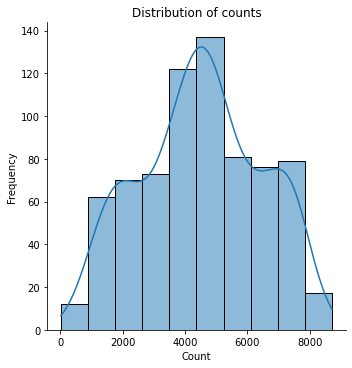

In [28]:
# Checking the distribution of counts
sns.displot(bike["Count"], bins=10, kde=True)
plt.title("Distribution of counts")
plt.ylabel("Frequency")
plt.show()

#### <font color="blue">Inference from the plot
> - The distribution of the counts is almost normally distributed.
> - On average around 4500 customers utilizing the bike service per day.

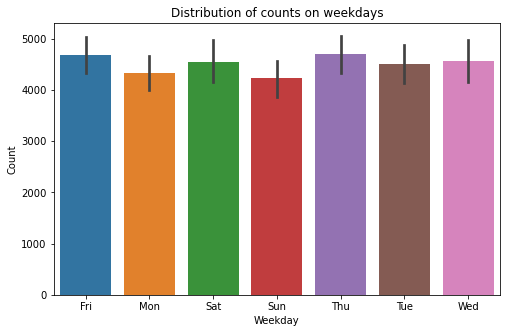

In [29]:
# Checking the counts on weekdays 
plt.figure(figsize=[8,5])
sns.barplot(data=bike, x="Weekday", y=bike["Count"])
plt.title("Distribution of counts on weekdays")
plt.show()

#### <font color="blue">Inference from the plot
> - The usage of bike is less on sundays.

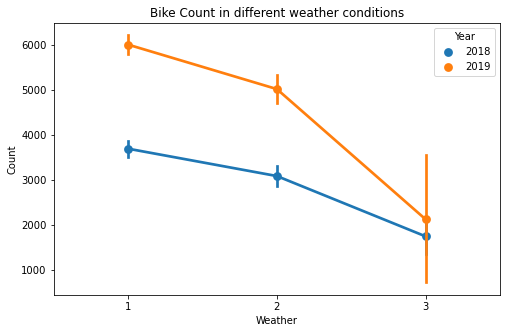

In [30]:
# Checking the counts with respect to weather
fig, ax = plt.subplots(figsize=[8,5])
sns.pointplot(data=bike, x="Weather", y="Count", hue="Year")
ax.set(title="Bike Count in different weather conditions")
plt.show()

#### <font color="blue">Inference from the plot
> - when there is light snow, light rain, thunderstorm the number of bike users decreases.
> - From the data it is evident that, when there is heavy rain, ice pallets, snow and fog, no one uses the bike.
> - The number of users were increased by 2019 with significant increase.

Text(0.5, 1.0, 'Counts on Holiday')

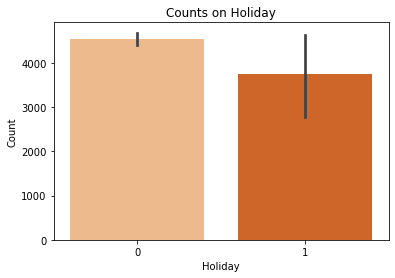

In [31]:
# Checking the distribution on holidays
plt.figure(figsize=[6,4])
sns.barplot(data=bike, x="Holiday", y="Count",palette="Oranges")
plt.title("Counts on Holiday")

#### <font color="blue">Inference from the plot
> - The number of bike users are less on holidays.

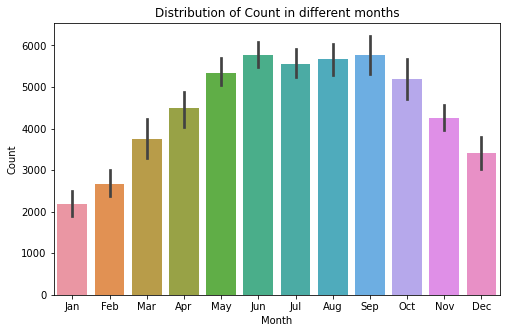

In [33]:
# Checking the distribution of counts on different months
plt.figure(figsize=[8,5])
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
sns.barplot(data=bike, x="Month", y="Count", order=month_order)
plt.title("Distribution of Count in different months")
plt.show()

#### <font color="blue">Inference from the plot
> - The number of counts is very less on january month.
> - Most counts are in the month june to sep.

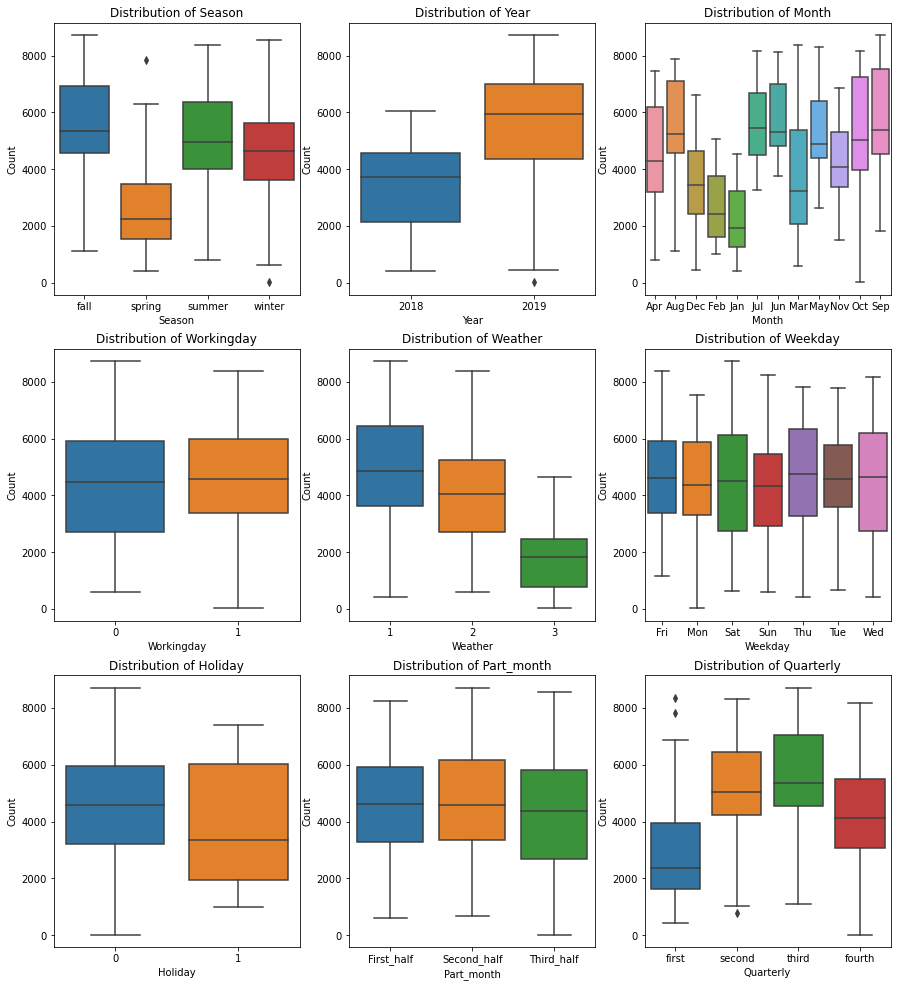

In [37]:
# Creating a function for boxplot
def boxplot(a,b):
    plt.subplot(3,3,a)
    plt.title("Distribution of"+" "+b)
    sns.boxplot(data=bike, x=b, y="Count")

# Plotting the boxplot for all categorical variables
plt.figure(figsize=[15,17])
Cat_bike = ["Season","Year","Month","Workingday","Weather","Weekday","Holiday","Part_month","Quarterly"]#Categorical data of bike
ax = 1
for i in Cat_bike:
    boxplot(ax,i)
    ax+=1   

#### <font color="blue">Inference from the plot
> - The number of bike users in spring is very low.
> - The count has increased significantly in 2019.
> - The count is less on holidays
> - The count is less on sundays
> - The number of bike users are more in clear, few clouds climate.
> - From the distribution of part_month it is evident that in the third half the count is less.
> - In the middle of the year the count is increasing. and in the first quarter of the year the count is vey less.

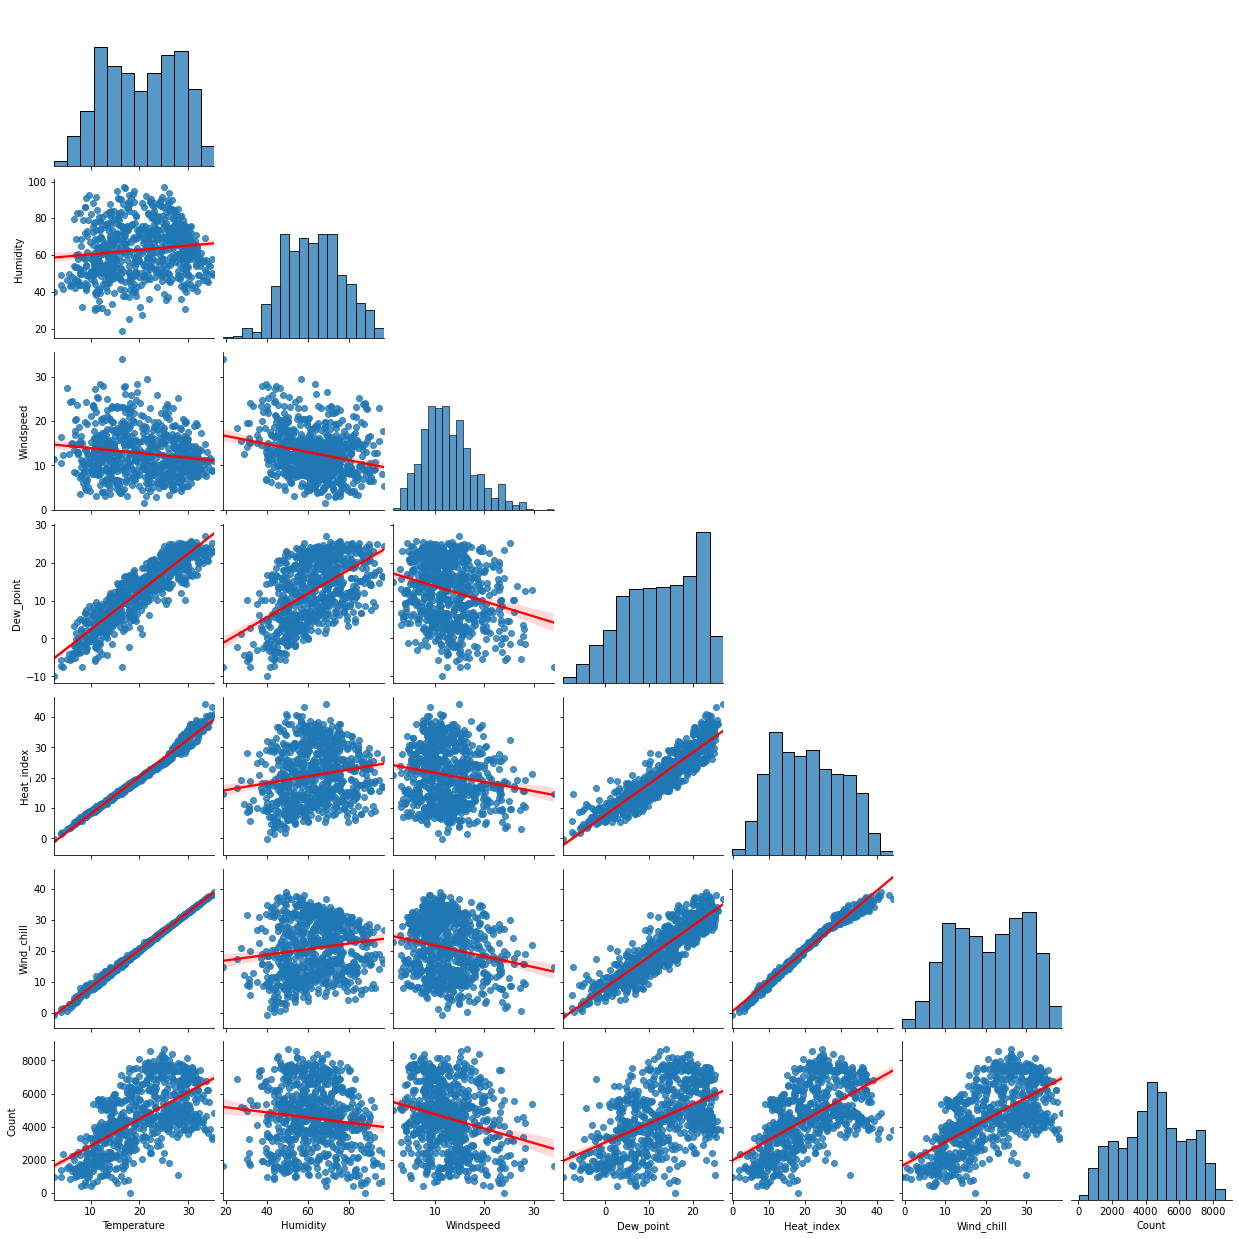

In [40]:
# Plotting pairplot for continuous variable
sns.pairplot(data=bike, vars=["Temperature","Humidity","Windspeed","Dew_point","Heat_index","Wind_chill","Count"],  
             corner=True, kind="reg",plot_kws= {"line_kws":{"color":"red"}})
plt.show()

#### <font color="blue">Inference from the plot
> - There is high positive correlation between temperature and count.
> - There is negative correlation between count and windspeed.
> - Humidity and windspeed are negatively correlated.
> - Heat index and count are highly positively correlated
> - wind chill and count also highly correlated
> - dew point and count are highly correlated.

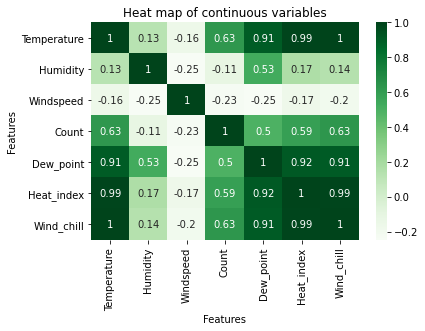

In [41]:
# Plotting heat map of continuos variable
sns.heatmap(bike.corr(), cmap="Greens", annot=True)
plt.title("Heat map of continuous variables")
plt.show()

#### <font color="blue">Inference from the plot
> - From the heat map it is evident that there is high positive correlation between temperature and count.
> - Dew point, heat index and wind chill are also highly correlated with temperature and also with each other.

### Data Preparation

#### 1. Dummy variables creation:

In [43]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 1 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Season       729 non-null    category
 1   Year         729 non-null    category
 2   Month        729 non-null    category
 3   Holiday      729 non-null    category
 4   Weekday      729 non-null    category
 5   Workingday   729 non-null    category
 6   Weather      729 non-null    category
 7   Temperature  729 non-null    float64 
 8   Humidity     729 non-null    float64 
 9   Windspeed    729 non-null    float64 
 10  Count        729 non-null    int64   
 11  Quarterly    729 non-null    category
 12  Dew_point    729 non-null    float64 
 13  Heat_index   729 non-null    float64 
 14  Wind_chill   729 non-null    float64 
 15  Part_month   729 non-null    category
dtypes: category(9), float64(6), int64(1)
memory usage: 69.9 KB


In [44]:
# Creating dummy variable for categorical features
status = pd.get_dummies(bike[Cat_bike], drop_first=True)

# Concatenating the dummies to the original dataset
bike = pd.concat([bike, status], axis=1)

#dropping the original features as we created the dummies for that
bike.drop(Cat_bike, axis=1, inplace=True)
print("The shape of the bike dataset after creating dummy variables is",bike.shape)
bike.head()

The shape of the bike dataset after creating dummy variables is (729, 37)


,Temperature,Humidity,Windspeed,Count,Dew_point,Heat_index,Wind_chill,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Workingday_1,Weather_2,Weather_3,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Holiday_1,Part_month_Second_half,Part_month_Third_half,Quarterly_second,Quarterly_third,Quarterly_fourth
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.110847,80.5833,10.749882,985,10.824,13.682,13.445268,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,14.902598,69.6087,16.652113,801,9.401,14.266,13.817173,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,8.050924,43.7273,16.636703,1349,-3.536,6.053,5.300116,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,8.200000,59.0435,10.739832,1562,0.683,6.617,6.346426,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,9.305237,43.6957,12.522300,1600,-2.406,7.432,7.394738,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [45]:
bike.describe()

,Temperature,Humidity,Windspeed,Count,Dew_point,Heat_index,Wind_chill,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Workingday_1,Weather_2,Weather_3,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Holiday_1,Part_month_Second_half,Part_month_Third_half,Quarterly_second,Quarterly_third,Quarterly_fourth
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,20.325249,62.851273,12.757060,4513.336077,12.682257,20.763671,20.796730,0.245542,0.252401,0.244170,0.500686,0.085048,0.085048,0.076818,0.085048,0.085048,0.082305,0.083676,0.085048,0.082305,0.085048,0.082305,0.683128,0.337449,0.027435,0.144033,0.144033,0.144033,0.141289,0.142661,0.141289,0.028807,0.329218,0.342936,0.249657,0.252401,0.252401
std,7.510137,14.055910,5.196382,1931.975331,8.327613,9.327566,9.141258,0.430704,0.434688,0.429889,0.500343,0.279145,0.279145,0.266485,0.279145,0.279145,0.275017,0.277092,0.279145,0.275017,0.279145,0.275017,0.465577,0.473164,0.163459,0.351364,0.351364,0.351364,0.348559,0.349967,0.348559,0.167377,0.470252,0.475016,0.433112,0.434688,0.434688
min,2.424346,18.791700,1.500244,22.000000,-9.785000,-0.233000,-0.763418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.803347,52.000000,9.041650,3190.000000,6.070000,12.823000,12.873819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.500000,62.666700,12.125325,4549.000000,13.433000,20.168000,20.966392,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.889153,73.000000,15.624936,5976.000000,20.274000,28.432000,28.741942,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,35.328347,97.250000,34.000021,8714.000000,26.972000,44.414000,38.945414,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


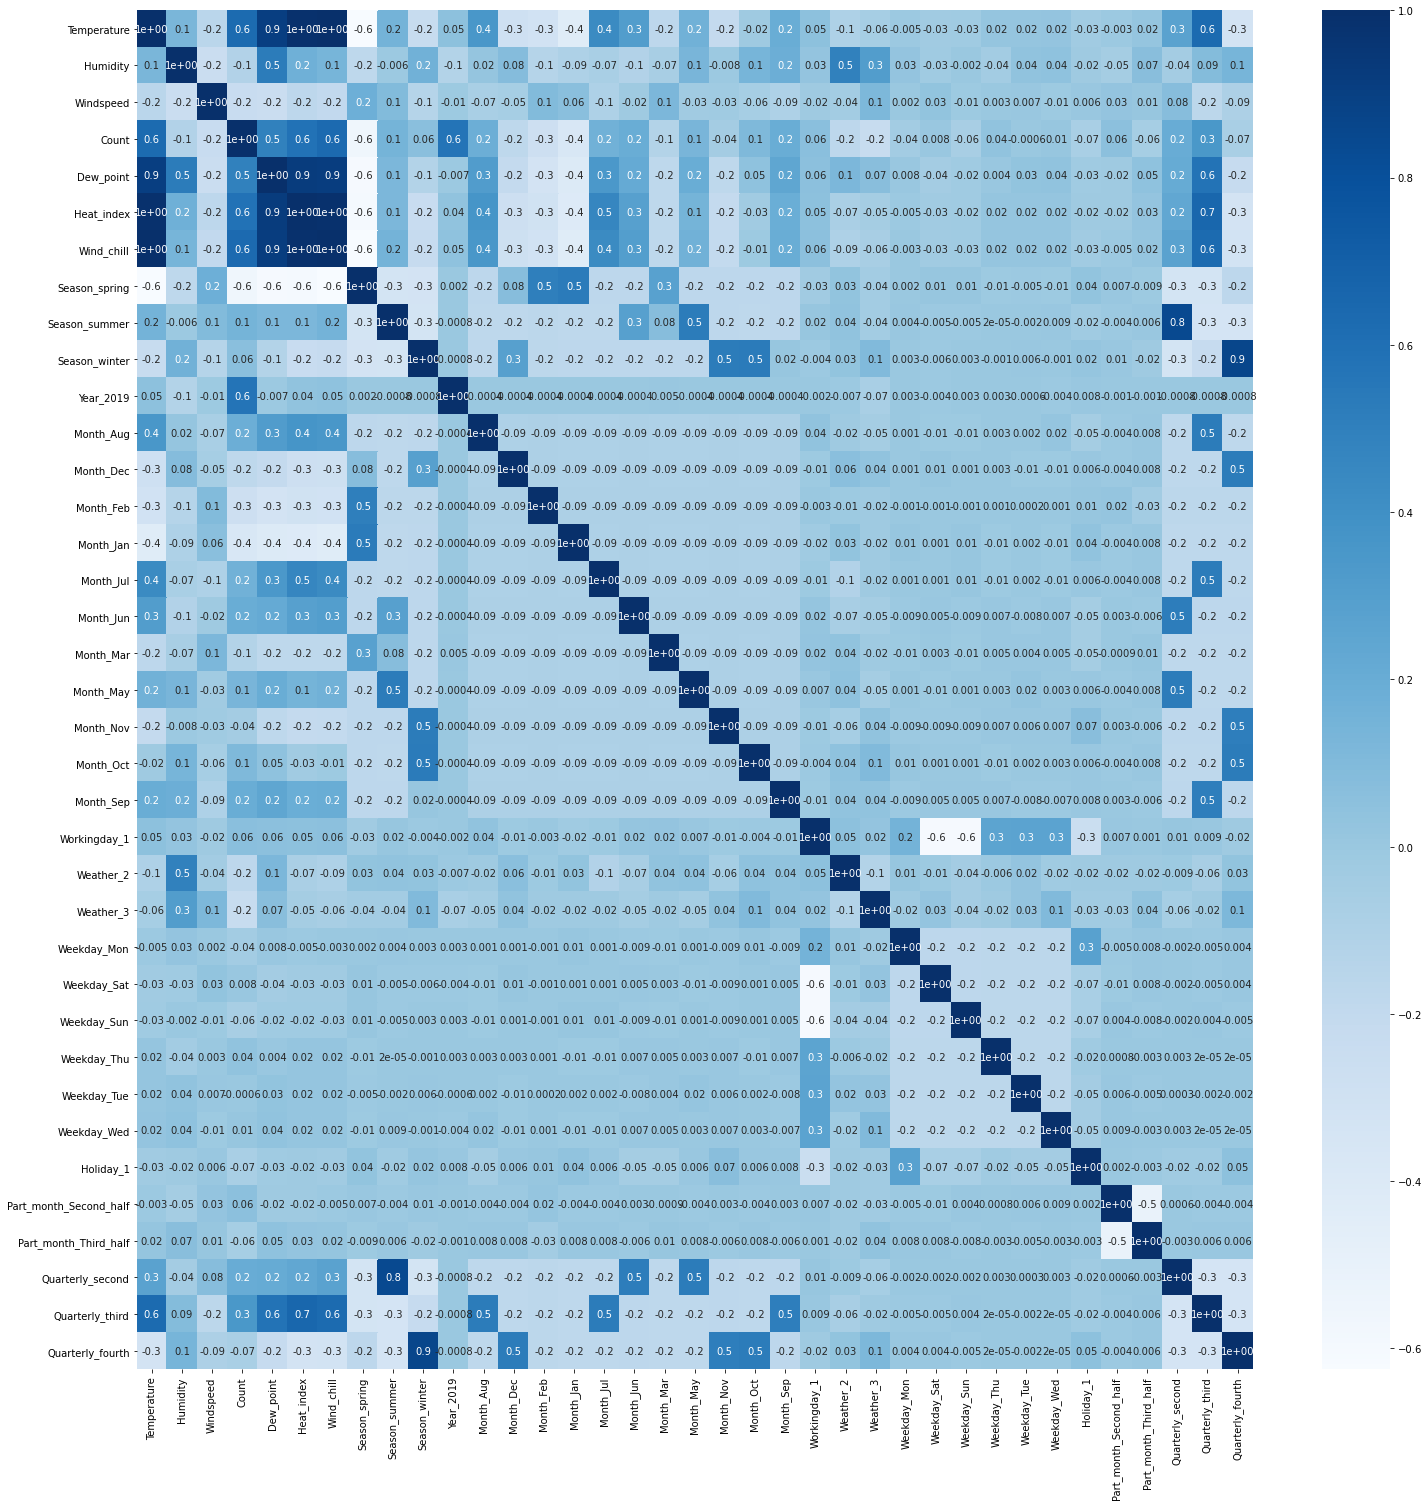

In [46]:
# Plotting a heatmap to visualize the correlation of all dummy variables
plt.figure(figsize=[25,25])
sns.heatmap(bike.corr(), cmap="Blues", annot=True, fmt="0.1")
plt.show()

#### <font color="blue">Inference from the plot
> - From the heat map we can easily find out the independent variables that are highly correlated, so that we can eliminate the feature to avoid multicollinearity.

#### 2. Splitting into train/test set:

In [47]:
# Importing train_test_split and MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting into train set and test set
bike_train, bike_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)
print("The shape of the train dataset is",bike_train.shape)
print("The shape of the test dataset is", bike_test.shape)

The shape of the train dataset is (510, 37)
The shape of the test dataset is (219, 37)


#### 3. Rescaling the train set:

In [49]:
# Creating a list of numerical variables
Num_bike = ["Temperature","Humidity","Windspeed","Count","Dew_point","Heat_index","Wind_chill"]

# Scaling the numerical variables with min max scaler
scaler = MinMaxScaler()
bike_train[Num_bike] = scaler.fit_transform(bike_train[Num_bike])
bike_train.describe()

,Temperature,Humidity,Windspeed,Count,Dew_point,Heat_index,Wind_chill,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Workingday_1,Weather_2,Weather_3,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Holiday_1,Part_month_Second_half,Part_month_Third_half,Quarterly_second,Quarterly_third,Quarterly_fourth
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.540678,0.571669,0.318011,0.496352,0.631704,0.504036,0.539730,0.243137,0.243137,0.247059,0.511765,0.090196,0.094118,0.066667,0.084314,0.080392,0.074510,0.094118,0.090196,0.082353,0.080392,0.088235,0.674510,0.349020,0.021569,0.137255,0.139216,0.158824,0.149020,0.135294,0.141176,0.027451,0.327451,0.356863,0.239216,0.258824,0.256863
std,0.225277,0.182541,0.170567,0.235715,0.234773,0.222016,0.227224,0.429398,0.429398,0.431725,0.500352,0.286744,0.292279,0.249689,0.278131,0.272166,0.262857,0.292279,0.286744,0.275172,0.272166,0.283915,0.469018,0.477128,0.145413,0.344454,0.346511,0.365870,0.356457,0.342373,0.348545,0.163554,0.469744,0.479544,0.427024,0.438419,0.437332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350497,0.431818,0.192829,0.333213,0.447614,0.323366,0.347921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.575578,0.296767,0.498008,0.649907,0.484653,0.540765,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.742223,0.704680,0.414082,0.685832,0.842991,0.688338,0.740908,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 4. Creating dependent and independent variables of train set:

In [50]:
# Creating X_train and y_train from training dataset
y_train = bike_train.pop("Count")
X_train = bike_train
print("The shape of y_train is", y_train.shape)
print("The shape of X_train is", X_train.shape)

The shape of y_train is (510,)
The shape of X_train is (510, 36)


### Model Building

In [51]:
# Importing RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

> #### RFE:
> - Recursive feature elimination is a method of automatic feature elimination. and using this lets reduce the features upto considerable count where we can perform manual feature selection.


In [52]:
# Calling the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE
# Reducing upto 15 features
rfe = RFE(lm, 15)   
rfe = rfe.fit(X_train,y_train)

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Temperature', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('Dew_point', True, 1),
 ('Heat_index', True, 1),
 ('Wind_chill', False, 13),
 ('Season_spring', True, 1),
 ('Season_summer', False, 21),
 ('Season_winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_Aug', False, 20),
 ('Month_Dec', False, 17),
 ('Month_Feb', False, 19),
 ('Month_Jan', False, 12),
 ('Month_Jul', True, 1),
 ('Month_Jun', False, 16),
 ('Month_Mar', False, 5),
 ('Month_May', False, 14),
 ('Month_Nov', False, 7),
 ('Month_Oct', False, 2),
 ('Month_Sep', True, 1),
 ('Workingday_1', True, 1),
 ('Weather_2', True, 1),
 ('Weather_3', True, 1),
 ('Weekday_Mon', False, 9),
 ('Weekday_Sat', True, 1),
 ('Weekday_Sun', False, 4),
 ('Weekday_Thu', False, 8),
 ('Weekday_Tue', False, 10),
 ('Weekday_Wed', False, 11),
 ('Holiday_1', False, 3),
 ('Part_month_Second_half', False, 22),
 ('Part_month_Third_half', False, 6),
 ('Quarterly_second', False, 18),
 ('Quarterly_third', False, 15),
 ('Quarterly_fourth', T

In [54]:
# Extracting the columns from the X_train that are selected through RFE
col = X_train.columns[rfe.support_]

# Creating a new dataset with features selected by RFE
X_train_rfe = X_train[col]
X_train_rfe.shape

(510, 15)

In [56]:
# Importing variance inflation factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a function that gives vif table for the dataframe input
def vif_table(a):
    vif = pd.DataFrame()
    X = a.drop("const", axis=1)
    vif["features"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
    return vif.sort_values(by = "VIF", ascending=False)

#### Model 1

In [57]:
# Adding constant to the varible
X_train_1 = sm.add_constant(X_train_rfe)

# Creating model 1
model_1 = sm.OLS(y_train, X_train_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     216.8
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.86e-206
Time:                        20:53:09   Log-Likelihood:                 530.51
No. Observations:                 510   AIC:                            -1029.
Df Residuals:                     494   BIC:                            -961.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3300      0.051      6.484      0.000       0.230       0.430
Temperature          0.8505      0.264      3.219      0.001       0.331       1.369
Humidity            -0.7360      0.157     -4.678      0.000      -1.045      -0.427
Windspeed           -0.1534      0.025     -6.165      0.000      -0.202      -0.105
Dew_point            1.2741      0.281      4.540      0.000       0.723       1.825
Heat_index          -1.5021      0.169     -8.884      0.000      -1.834      -1.170
Season_spring       -0.0978      0.014     -6.751      0.000      -0.126      -0.069
Season_winter        0.0779      0.020      3.861      0.000       0.038       0.118
Year_2019            0.2336      0.008     29.632      0.000       0.218       0.249
Month_Jul           -0.0353      0.017     -2.047      0.041      -0.069      -0.001
Month_Sep            0.0545      0.015      3.592      0.000       0.025       0.084
Workingday_1         0.0505      0.010      4.970      0.000       0.031       0.071
Weather_2           -0.0524      0.010     -5.060      0.000      -0.073      -0.032
Weather_3           -0.1933      0.032     -6.106      0.000      -0.256      -0.131
Weekday_Sat          0.0613      0.014      4.458      0.000       0.034       0.088
Quarterly_fourth    -0.0340      0.019     -1.778      0.076      -0.072       0.004
==============================================================================
Omnibus:                       74.953   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.918
Skew:                          -0.747   Prob(JB):                     9.48e-42
Kurtosis:                       5.580   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Checking vif values
vif_table(X_train_1)

,features,VIF
3,Dew_point,767.65
4,Heat_index,585.68
0,Temperature,583.95
1,Humidity,142.59
6,Season_winter,6.71
14,Quarterly_fourth,6.33
2,Windspeed,5.27
10,Workingday_1,4.60
5,Season_spring,3.12
11,Weather_2,2.43


####  <font color = "blue">Suggestion:
> - We can drop Dew_point feature as it have high vif value.

#### Model 2

In [59]:
# Dropping the humidity column
X_train_rfe2 =  X_train_rfe.drop("Dew_point", axis=1)

# Adding constant 
X_train_2 = sm.add_constant(X_train_rfe2)

# Building model
model_2 = sm.OLS(y_train, X_train_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     222.1
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.91e-203
Time:                        20:54:25   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     495   BIC:                            -946.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1391      0.029      4.756      0.000       0.082       0.197
Temperature          1.8023      0.164     10.999      0.000       1.480       2.124
Humidity            -0.0376      0.034     -1.115      0.265      -0.104       0.029
Windspeed           -0.1631      0.025     -6.453      0.000      -0.213      -0.113
Heat_index          -1.3320      0.168     -7.924      0.000      -1.662      -1.002
Season_spring       -0.0975      0.015     -6.602      0.000      -0.126      -0.068
Season_winter        0.0788      0.021      3.829      0.000       0.038       0.119
Year_2019            0.2352      0.008     29.294      0.000       0.219       0.251
Month_Jul           -0.0400      0.018     -2.278      0.023      -0.074      -0.005
Month_Sep            0.0585      0.015      3.788      0.000       0.028       0.089
Workingday_1         0.0510      0.010      4.917      0.000       0.031       0.071
Weather_2           -0.0577      0.010     -5.502      0.000      -0.078      -0.037
Weather_3           -0.2328      0.031     -7.498      0.000      -0.294      -0.172
Weekday_Sat          0.0563      0.014      4.029      0.000       0.029       0.084
Quarterly_fourth    -0.0296      0.019     -1.519      0.129      -0.068       0.009
==============================================================================
Omnibus:                       77.198   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.547
Skew:                          -0.772   Prob(JB):                     1.55e-42
Kurtosis:                       5.584   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Checking vif values
vif_table(X_train_2)

,features,VIF
3,Heat_index,497.05
0,Temperature,493.34
1,Humidity,18.28
5,Season_winter,6.56
13,Quarterly_fourth,6.33
9,Workingday_1,4.41
2,Windspeed,4.33
4,Season_spring,2.46
10,Weather_2,2.41
6,Year_2019,2.11


####  <font color = "blue">Suggestion:
> - We can drop Temperature as it have high vif value, as heat index will be very useful.

#### Model 3

In [61]:
# Dropping Month nov feature
X_train_rfe3 = X_train_rfe2.drop("Temperature", axis=1)

# Adding constant
X_train_3 = sm.add_constant(X_train_rfe3)

# Building model
Model_3 = sm.OLS(y_train, X_train_3).fit()
Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.1
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.07e-180
Time:                        20:56:55   Log-Likelihood:                 464.33
No. Observations:                 510   AIC:                            -900.7
Df Residuals:                     496   BIC:                            -841.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2740      0.030      9.258      0.000       0.216       0.332
Humidity            -0.1650      0.035     -4.681      0.000      -0.234      -0.096
Windspeed           -0.1648      0.028     -5.849      0.000      -0.220      -0.109
Heat_index           0.4844      0.035     13.864      0.000       0.416       0.553
Season_spring       -0.1328      0.016     -8.266      0.000      -0.164      -0.101
Season_winter        0.0875      0.023      3.817      0.000       0.042       0.133
Year_2019            0.2386      0.009     26.690      0.000       0.221       0.256
Month_Jul           -0.0876      0.019     -4.620      0.000      -0.125      -0.050
Month_Sep            0.0575      0.017      3.343      0.001       0.024       0.091
Workingday_1         0.0610      0.012      5.303      0.000       0.038       0.084
Weather_2           -0.0546      0.012     -4.676      0.000      -0.078      -0.032
Weather_3           -0.2052      0.034     -5.952      0.000      -0.273      -0.137
Weekday_Sat          0.0612      0.016      3.930      0.000       0.031       0.092
Quarterly_fourth    -0.0417      0.022     -1.925      0.055      -0.084       0.001
==============================================================================
Omnibus:                       53.366   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.389
Skew:                          -0.538   Prob(JB):                     1.08e-29
Kurtosis:                       5.263   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Checking vif values
vif_table(X_train_3)

,features,VIF
0,Humidity,17.89
2,Heat_index,14.61
4,Season_winter,6.45
12,Quarterly_fourth,6.32
8,Workingday_1,4.19
1,Windspeed,4.12
3,Season_spring,2.46
9,Weather_2,2.40
5,Year_2019,2.09
11,Weekday_Sat,1.64


####  <font color = "blue">Suggestion:
> - We can drop Humidity feature, as it have high vif value.

####  Model 4

In [65]:
# Dropping windspeed feature
X_train_rfe4 = X_train_rfe3.drop("Humidity", axis=1)

# Creating constant
X_train_4 = sm.add_constant(X_train_rfe4)

# Building model
Model_4 = sm.OLS(y_train, X_train_4).fit()
Model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     190.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.26e-177
Time:                        20:59:51   Log-Likelihood:                 453.31
No. Observations:                 510   AIC:                            -880.6
Df Residuals:                     497   BIC:                            -825.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2067      0.026      7.827      0.000       0.155       0.259
Windspeed           -0.1219      0.027     -4.483      0.000      -0.175      -0.068
Heat_index           0.4303      0.034     12.784      0.000       0.364       0.496
Season_spring       -0.1422      0.016     -8.738      0.000      -0.174      -0.110
Season_winter        0.0848      0.023      3.624      0.000       0.039       0.131
Year_2019            0.2447      0.009     27.096      0.000       0.227       0.262
Month_Jul           -0.0729      0.019     -3.820      0.000      -0.110      -0.035
Month_Sep            0.0502      0.017      2.870      0.004       0.016       0.085
Workingday_1         0.0629      0.012      5.362      0.000       0.040       0.086
Weather_2           -0.0876      0.010     -9.203      0.000      -0.106      -0.069
Weather_3           -0.2772      0.032     -8.798      0.000      -0.339      -0.215
Weekday_Sat          0.0664      0.016      4.191      0.000       0.035       0.098
Quarterly_fourth    -0.0536      0.022     -2.437      0.015      -0.097      -0.010
==============================================================================
Omnibus:                       52.165   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.618
Skew:                          -0.535   Prob(JB):                     3.20e-28
Kurtosis:                       5.194   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Checking vif
vif_table(X_train_4)

,features,VIF
1,Heat_index,6.32
3,Season_winter,6.28
11,Quarterly_fourth,6.19
7,Workingday_1,4.10
0,Windspeed,4.06
4,Year_2019,2.08
2,Season_spring,1.87
10,Weekday_Sat,1.63
8,Weather_2,1.55
5,Month_Jul,1.43


####  <font color = "blue">Suggestion:
> - We can drop Quartely_fourth feature as it have high p-value

#### Model 5

In [68]:
# Dropping Holiday_1 feature
X_train_rfe5 = X_train_rfe4.drop("Quarterly_fourth", axis=1)

# Adding constant
X_train_5 = sm.add_constant(X_train_rfe5)

# Building model
Model_5 = sm.OLS(y_train, X_train_5).fit()
Model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.20e-177
Time:                        21:01:07   Log-Likelihood:                 450.28
No. Observations:                 510   AIC:                            -876.6
Df Residuals:                     498   BIC:                            -825.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2012      0.026      7.609      0.000       0.149       0.253
Windspeed        -0.1210      0.027     -4.428      0.000      -0.175      -0.067
Heat_index        0.4350      0.034     12.880      0.000       0.369       0.501
Season_spring    -0.1454      0.016     -8.921      0.000      -0.177      -0.113
Season_winter     0.0380      0.013      2.827      0.005       0.012       0.064
Year_2019         0.2452      0.009     27.029      0.000       0.227       0.263
Month_Jul        -0.0717      0.019     -3.740      0.000      -0.109      -0.034
Month_Sep         0.0639      0.017      3.839      0.000       0.031       0.097
Workingday_1      0.0633      0.012      5.370      0.000       0.040       0.087
Weather_2        -0.0880      0.010     -9.204      0.000      -0.107      -0.069
Weather_3        -0.2849      0.032     -9.045      0.000      -0.347      -0.223
Weekday_Sat       0.0656      0.016      4.118      0.000       0.034       0.097
==============================================================================
Omnibus:                       55.964   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.552
Skew:                          -0.575   Prob(JB):                     3.68e-30
Kurtosis:                       5.249   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Checking vif values
vif_table(X_train_5)

,features,VIF
1,Heat_index,6.32
7,Workingday_1,4.10
0,Windspeed,4.06
4,Year_2019,2.07
2,Season_spring,1.81
10,Weekday_Sat,1.63
8,Weather_2,1.55
5,Month_Jul,1.43
3,Season_winter,1.42
6,Month_Sep,1.21


####  <font color = "blue">Suggestion:
> - We can drop Season_winter feature as it have high p-value.

#### Model 6

In [ ]:
# Dropping month_mar feature
X_train_rfe6 = X_train_rfe5.drop("Month_Mar", axis=1)

# Adding constant
X_train_6 = sm.add_constant(X_train_rfe6)

# Building model
Model_6 = sm.OLS(y_train, X_train_6).fit()
Model_6.summary()

In [ ]:
# Checking vif values
vif_table(X_train_6)

####  <font color = "blue">Suggestion:
> - We can drop quarterly_second as it have high p-value comparing to others.

#### Model 7